In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

# Connect to your SQLite database
conn = sqlite3.connect('prebrani_podatki.db')  # Replace with your DB file path

# Query the columns you need
query = """
SELECT timestamp_ms, sensor_id, direction, value
FROM podatki
ORDER BY timestamp_ms
"""

# Load the data into a DataFrame
df = pd.read_sql(query, conn)

# Close the connection
#conn.close()

# Check the first rows
#print(df.tail())


In [35]:
def my_linspace(start, interval, num_points):
    return [start + i * interval for i in range(num_points)]

time_dist = my_linspace(0, 0.05, 180)  
time_acc  = my_linspace(0, 0.005, 1670)

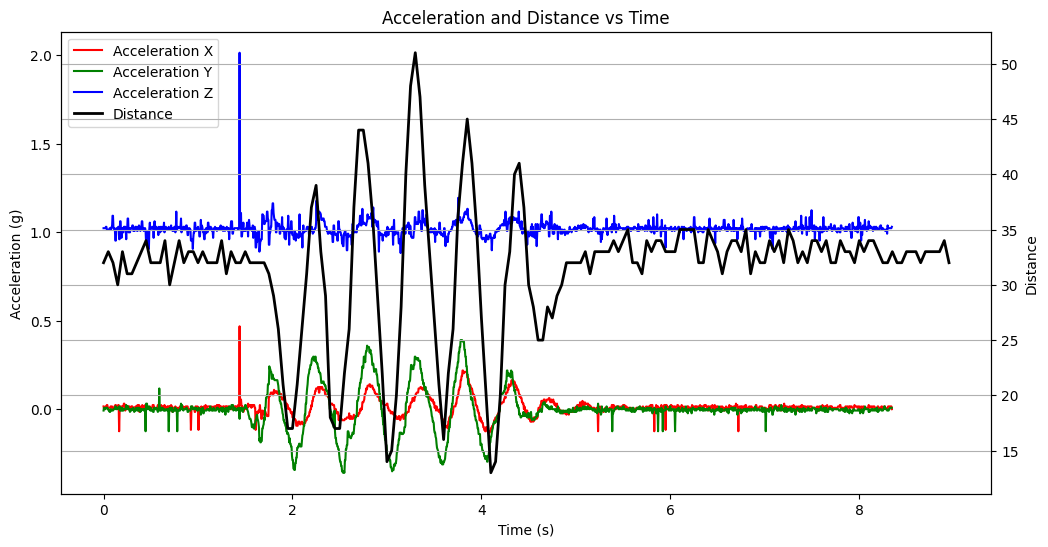

In [36]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# -------------------------
# Left Y-axis: Acceleration
# -------------------------
colors = {'x': 'red', 'y': 'green', 'z': 'blue'}
for direction in ['x', 'y', 'z']:
    dir_data = acc_data[acc_data['direction'] == direction]
    ax1.plot(time_acc, dir_data['value'], label=f'Acceleration {direction.upper()}', color=colors[direction])

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Acceleration (g)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# -------------------------
# Right Y-axis: Distance
# -------------------------
ax2 = ax1.twinx()  # create a second y-axis sharing the same x-axis
ax2.plot(time_dist, dist_data['value'], label='Distance', color='black', linewidth=2)
ax2.set_ylabel('Distance', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# -------------------------
# Legends
# -------------------------
# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Acceleration and Distance vs Time')
plt.grid()
plt.savefig('Acceleration_distance_time')
plt.show()


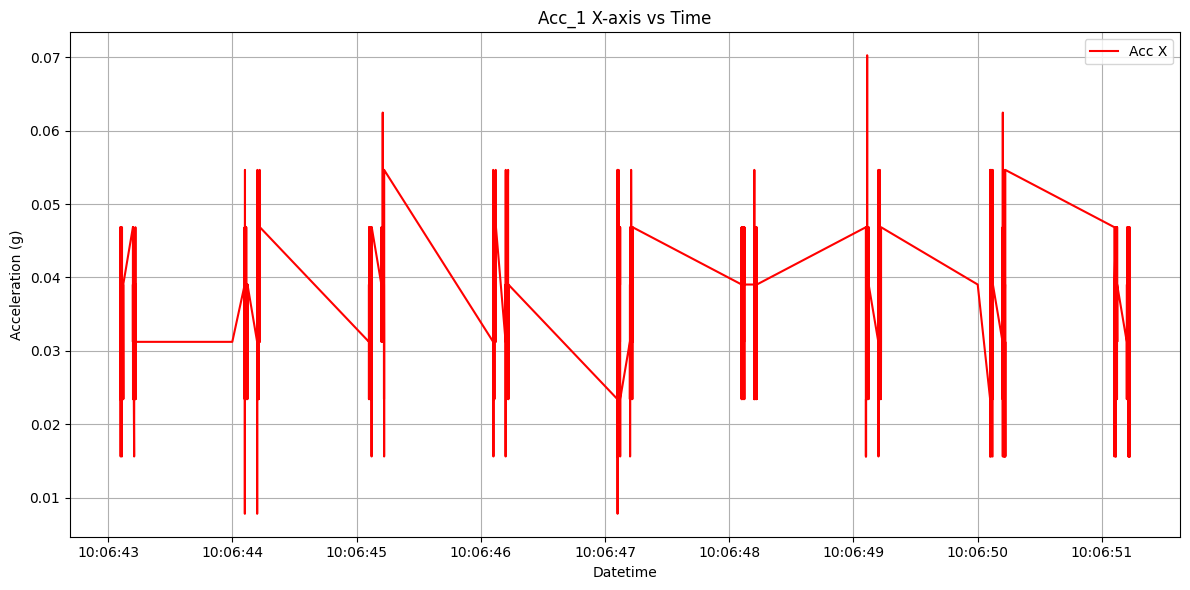

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


conn = sqlite3.connect('prebrani_podatki.db')


query = """
SELECT datetime, value
FROM podatki
WHERE sensor_id = 'acc_1' AND direction = 'x'
ORDER BY datetime
"""
df = pd.read_sql(query, conn)
conn.close()


df['datetime'] = pd.to_datetime(df['datetime'])


plt.figure(figsize=(12,6))
plt.plot(df['datetime'], df['value'], color='red', label='Acc X')
plt.xlabel('Datetime')
plt.ylabel('Acceleration (g)')
plt.title('Acc_1 X-axis vs Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


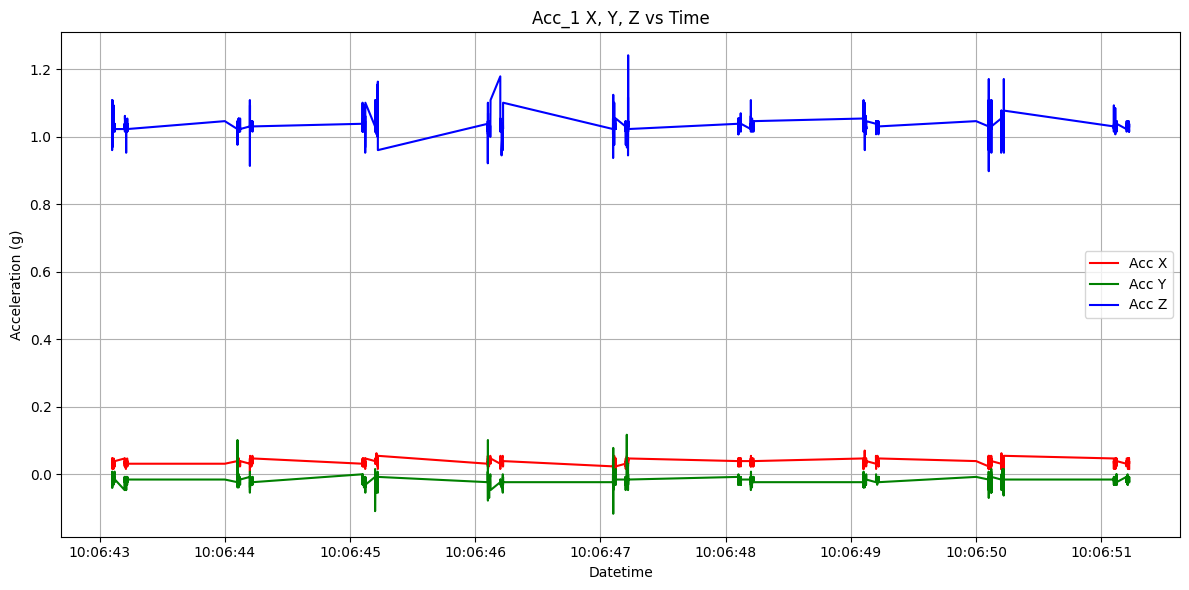

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


conn = sqlite3.connect('prebrani_podatki.db')


query = """
SELECT datetime, direction, value
FROM podatki
WHERE sensor_id = 'acc_1' AND direction IN ('x','y','z')
ORDER BY datetime
"""
df = pd.read_sql(query, conn)
conn.close()

df['datetime'] = pd.to_datetime(df['datetime'])


plt.figure(figsize=(12,6))

colors = {'x':'red', 'y':'green', 'z':'blue'}

for direction in ['x','y','z']:
    dir_data = df[df['direction'] == direction]
    plt.plot(dir_data['datetime'], dir_data['value'], color=colors[direction], label=f'Acc {direction.upper()}')

plt.xlabel('Datetime')
plt.ylabel('Acceleration (g)')
plt.title('Acc_1 X, Y, Z vs Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

